In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 1.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 41.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully u

In [3]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!pip install opencv-python matplotlib

In [9]:
!pip install --upgrade tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten
import tensorflow as tf

In [5]:
import tensorflow as tf
from tensorflow.python.client import device_lib

# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

# List GPUs
gpus = tf.config.list_physical_devices('GPU')
print("GPUs detected:", gpus)

# Enable memory growth if GPUs are found
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("Memory growth enabled for GPUs.")
else:
    print("No GPUs detected.")

# List all devices
print("\nAll local devices:")
print(device_lib.list_local_devices())

TensorFlow Version: 2.17.0
GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth enabled for GPUs.

All local devices:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11565271089380798943
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 598543777191476083
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [6]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11465459723409505122
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11432785823352884448
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [8]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.17.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
anchor=tf.data.Dataset.list_files('/kaggle/input/verif-proj/data/anchor/*jpg').take(3000)
negative=tf.data.Dataset.list_files('/kaggle/input/verif-proj/data/negative/*jpg').take(3000)
positive=tf.data.Dataset.list_files('/kaggle/input/verif-proj/data/positive/*jpg').take(3000)

In [11]:
dir_test=negative.as_numpy_iterator()

In [12]:
print(dir_test.next())

b'/kaggle/input/verif-proj/data/negative/Joseph_Kabila_0001.jpg'


In [13]:
def preprocess(path):
    byte_img=tf.io.read_file(path)
    img=tf.io.decode_jpeg(byte_img)
    #resizing the image 100x100x3 
    img=tf.image.resize(img,(105,105))
    #scale image between 0 and 1
    img=img/255.0
    return img

In [14]:
img=preprocess('/kaggle/input/verif-proj/data/negative/Margaret_Okayo_0001.jpg')

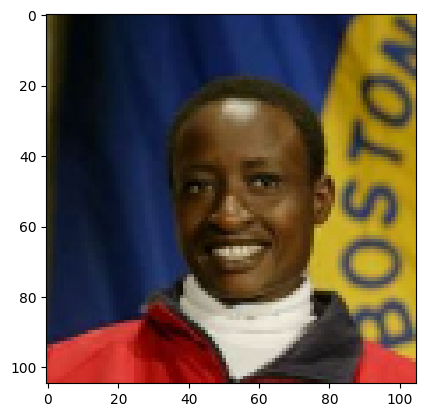

In [15]:
plt.imshow(img)

In [16]:
positives=tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [17]:
samples=data.as_numpy_iterator()
example=samples.next()

In [18]:
print(samples.next())

(b'/kaggle/input/verif-proj/data/anchor/07208649-349d-11ef-a33a-f43bd8a1d0d7.jpg', b'/kaggle/input/verif-proj/data/positive/a4a2e4bf-349d-11ef-924b-f43bd8a1d0d7.jpg', 1.0)


In [19]:
def preprocess_set(input_img,validation_img,label):
    return (preprocess(input_img),preprocess(validation_img),label)

In [20]:
res=preprocess_set(*example)

In [21]:
res[0]

<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
array([[[0.23921569, 0.23921569, 0.23137255],
        [0.24781246, 0.24305055, 0.2349273 ],
        [0.25583568, 0.24547152, 0.23193277],
        ...,
        [0.49533147, 0.581606  , 0.668254  ],
        [0.5051487 , 0.5914233 , 0.68161935],
        [0.5197946 , 0.6060691 , 0.69626516]],

       [[0.24313726, 0.23921569, 0.23137255],
        [0.25232092, 0.24677871, 0.23163266],
        [0.259197  , 0.24883287, 0.2351674 ],
        ...,
        [0.48870215, 0.5682206 , 0.65714294],
        [0.48605442, 0.5644458 , 0.65856344],
        [0.48711485, 0.5655462 , 0.659944  ]],

       [[0.24313726, 0.23921569, 0.23137255],
        [0.25325465, 0.23756836, 0.22580366],
        [0.25865456, 0.24668534, 0.23137255],
        ...,
        [0.48879552, 0.5637344 , 0.65350145],
        [0.4862745 , 0.5647059 , 0.6604709 ],
        [0.49197012, 0.5739496 , 0.6702147 ]],

       ...,

       [[0.21769153, 0.2052621 , 0.18698369],
        [0.26

In [22]:
res[2]

1.0

In [23]:
#build dataloader pipeline
data=data.map(preprocess_set)
data=data.cache()
data = data.shuffle(buffer_size=10000)

In [24]:
samples=data.as_numpy_iterator()

ex=samples.next()



In [25]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [26]:
len(train_data)

46

In [27]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [28]:
def make_embedding():
    inp=Input(shape=(105,105,3),name='input_image')
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    m1=MaxPooling2D(64,(2,2),padding='same')(c1)

    c2=Conv2D(128,(7,7),activation='relu')(m1)
    m2=MaxPooling2D(64,(2,2),padding='same')(c2)
    
    c3=Conv2D(128,(4,4),activation='relu')(m2)
    m3=MaxPooling2D(64,(2,2),padding='same')(c3)

    c4=Conv2D(256,(4,4),activation='relu')(m3)
    f1=Flatten()(c4)
    d1=Dense(4096,activation='sigmoid')(f1)
    
    return Model(inputs=inp,outputs=d1,name='embedding')

In [29]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()

    def call(self, inputs):
        input_embedding, validation_embedding = inputs
        return tf.math.abs(input_embedding - validation_embedding)

In [30]:
l1=L1Dist()

In [31]:
embedding=make_embedding()

In [32]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 105, 105, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 96, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
def make_siamese_model():
    input_image=Input(name='input_img',shape=(105,105,3))
    validation_image=Input(name='validation_img',shape=(105,105,3))
    siamese_layer=L1Dist()
    siamese_layer._name='distance'
    distances = siamese_layer([embedding(input_image), embedding(validation_image)])

    classifier=Dense(1,activation='sigmoid')(distances)
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='SiameseNetwork')

In [34]:
siamese_model=make_siamese_model()

In [35]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 105, 105, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 105, 105, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_1 (L1Dist)        │ (None, 4096)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
binary_cross_loss=tf.losses.BinaryCrossentropy()

In [37]:
opt=tf.keras.optimizers.Adam(1e-4)

In [38]:
model.summary

NameError: name 'model' is not defined

In [39]:
checkpoint_dir="./training_checkpoints"
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

In [40]:
test_batch = train_data.as_numpy_iterator()

In [41]:
batch_1 = test_batch.next()

In [42]:
batch_1

(array([[[[0.2509804 , 0.24705882, 0.23921569],
          [0.26666668, 0.2509804 , 0.23921569],
          [0.26600194, 0.25031567, 0.23855098],
          ...,
          [0.49383754, 0.59187675, 0.6746032 ],
          [0.49505135, 0.596732  , 0.686648  ],
          [0.50532216, 0.60728294, 0.70532215]],
 
         [[0.24733894, 0.24257703, 0.235014  ],
          [0.25936374, 0.24313726, 0.23137255],
          [0.2688142 , 0.2509804 , 0.23921569],
          ...,
          [0.4802321 , 0.572489  , 0.65754974],
          [0.47817126, 0.57254905, 0.6661465 ],
          [0.47843137, 0.57983196, 0.67815125]],
 
         [[0.24865724, 0.23297097, 0.2290494 ],
          [0.25758302, 0.23759504, 0.22595705],
          [0.27058825, 0.25098038, 0.23921569],
          ...,
          [0.47745988, 0.5621293 , 0.65527546],
          [0.47823796, 0.5668534 , 0.66591305],
          [0.4846761 , 0.5734716 , 0.6772064 ]],
 
         ...,
 
         [[0.34001878, 0.30987114, 0.2950964 ],
          [0.38236

In [43]:
X = batch_1[:2]

In [44]:
y = batch_1[2]

In [45]:
y

array([0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [46]:
np.array(X).shape #2 = anchor and postive or negative 16=batch size 

(2, 16, 105, 105, 3)

In [47]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        X=batch[:2]
        y=batch[2]
        #farword pass
        y_hat=siamese_model(X,training=True)
        #calc loss
        loss=binary_cross_loss(y,y_hat)
    #calc gradients
    grad=tape.gradient(loss,siamese_model.trainable_variables)
    #calc updated weights and apply to siamese model
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))

    return loss
    

In [48]:
from tensorflow.keras.metrics import Precision, Recall

In [49]:
def train(data, EPOCHS):
    # Ensure all operations run on GPU:0
    with tf.device('/GPU:0'):
        # Loop through epochs
        for epoch in range(1, EPOCHS+1):
            print('\n Epoch {}/{}'.format(epoch, EPOCHS))
            progbar = tf.keras.utils.Progbar(len(data))
            
            # Creating metric objects
            r = tf.keras.metrics.Recall()
            p = tf.keras.metrics.Precision()
            
            # Loop through each batch
            for idx, batch in enumerate(data):
                # Run train step here
                loss = train_step(batch)  # Ensure train_step uses GPU internally
                yhat = siamese_model.predict(batch[:2])  # Prediction on GPU
                r.update_state(batch[2], yhat)
                p.update_state(batch[2], yhat)
                progbar.update(idx+1)
            print(loss.numpy(), r.result().numpy(), p.result().numpy())
            
            # Save checkpoints
            if epoch % 10 == 0:
                checkpoint.save(file_prefix=checkpoint_prefix)

In [50]:
EPOCHS = 50
train(train_data, EPOCHS)


 Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/stept
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/stepe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/

In [54]:
siamese_model.save('/kaggle/working/siamese_model_final.h5')

In [55]:
siamese_model.save('/kaggle/working/siamese_model_final1.keras')

In [51]:
from tensorflow.keras.metrics import Recall,Precision

In [52]:
test_input,test_val,y_true=test_data.as_numpy_iterator().next()


In [ ]:
test_data.as_numpy_iterator()

In [62]:
y_hat=siamese_model.predict([test_input,test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[1.00000000e+00],
       [5.44785517e-13],
       [1.00000000e+00],
       [9.99998450e-01],
       [2.00119825e-12],
       [1.45790780e-12],
       [1.17560545e-11],
       [9.64065373e-12],
       [9.99975562e-01],
       [1.00000000e+00],
       [1.05219633e-09],
       [3.69190442e-12],
       [1.13385613e-10],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.80907631e-12]], dtype=float32)

In [63]:
preds=[1 if pred>0.5 else 0 for pred in yhat]

In [64]:
preds

[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [65]:
y_true

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [66]:
m=Recall()
m.update_state(y_true,y_hat)
m.result().numpy()

1.0

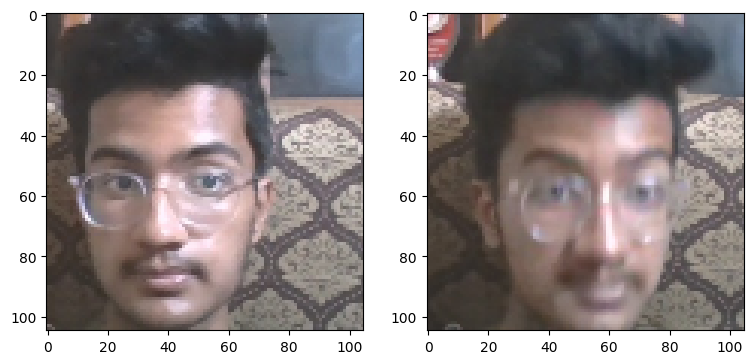

In [74]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

In [75]:
model=tf.keras.models.load_model('siamese_model_final.h5',custom_objects={'L1Dist':L1Dist,'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [76]:
model.predict([test_input,test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


array([[1.00000000e+00],
       [5.44785517e-13],
       [1.00000000e+00],
       [9.99998450e-01],
       [2.00119825e-12],
       [1.45790780e-12],
       [1.17560545e-11],
       [9.64065373e-12],
       [9.99975562e-01],
       [1.00000000e+00],
       [1.05219633e-09],
       [3.69190442e-12],
       [1.13385613e-10],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.80907631e-12]], dtype=float32)

In [77]:
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 105, 105, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 105, 105, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_2 (L1Dist)        │ (None, 4096)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)